In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


In [3]:
wine = pd.read_csv("wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(wine.iloc[:,1:])


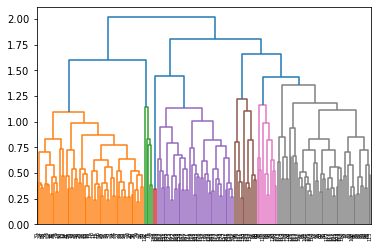

In [6]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))


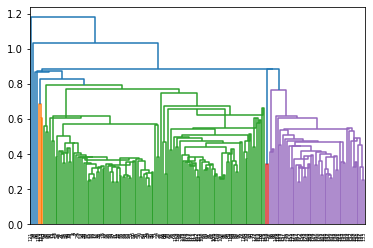

In [7]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))


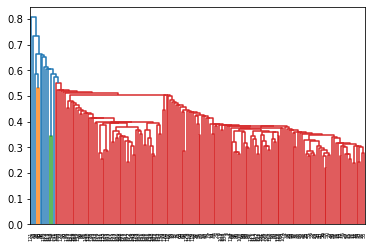

In [8]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))


In [9]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

df_norm['h_clusterid'] = hc.labels_
hc.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [10]:
#K-Means Clustering

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 


In [11]:
kmeans_clust=KMeans(n_clusters=5)
kmeans_clust.fit(df_norm)
kmeans_clust.labels_
wine["clusterid"]=pd.Series(kmeans_clust.labels_)
wine.head()
result= wine.iloc[:,1:].groupby(wine.clusterid).mean()
result

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
clusterid,,,,,,,,,,,,,,
0,12.312000,1.484000,2.346000,21.820000,141.400000,2.546000,2.674000,0.298000,2.474000,3.640000,1.148000,3.040000,771.000000,0
1,13.767895,1.944737,2.455088,17.001754,106.473684,2.851228,2.998596,0.290175,1.902105,5.566842,1.066842,3.154211,1129.421053,1
2,13.144000,3.346200,2.425600,21.330000,98.640000,1.677200,0.807000,0.450400,1.156400,7.264400,0.686200,1.698800,622.440000,2
3,12.347273,2.148788,2.191818,19.345455,90.939394,2.609091,2.477576,0.288182,1.865152,3.233030,1.032727,3.083636,505.303030,3
4,12.215758,1.799394,2.301818,20.818182,92.272727,1.918788,1.660909,0.434848,1.303636,2.876364,1.075333,2.520909,512.666667,4


In [12]:
wine.loc[wine.clusterid==2]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
83,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.800000,0.84,2.01,515,2
118,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.400000,0.70,2.12,372,2
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630,2
131,3,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530,2
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560,2
133,3,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600,2
134,3,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650,2
135,3,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695,2
136,3,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720,2
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.000000,0.82,1.69,515,2


In [13]:
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
      WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
TWSS


[array([108.40860382]),
 array([94.15174016]),
 array([88.99267037]),
 array([86.4611367]),
 array([84.16184449]),
 array([80.75788937])]

([<matplotlib.axis.XTick at 0xb394268>,
 <a list of 6 Text major ticklabel objects>)

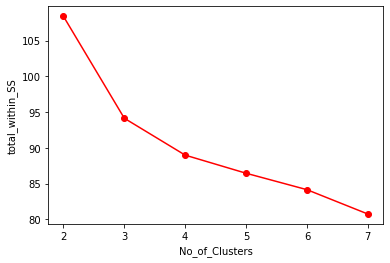

In [14]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [18]:
#PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [20]:
# Considering only numerical data 
wine.data = wine.iloc[:,1:]
wine.data.head()

<ipython-input-20-990a11154b7c>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine.data = wine.iloc[:,1:]


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [21]:
# Converting into numpy array
WINE = wine.data.values
WINE

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 3.920e+00, 1.065e+03,
        1.000e+00],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 3.400e+00, 1.050e+03,
        1.000e+00],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 3.170e+00, 1.185e+03,
        1.000e+00],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 1.560e+00, 8.350e+02,
        2.000e+00],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 1.620e+00, 8.400e+02,
        2.000e+00],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 1.600e+00, 5.600e+02,
        2.000e+00]])

In [23]:
# Normalizing the numerical data 
wine_normal = scale(WINE)
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.02406133],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.02406133],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.02406133],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537, -0.15604744],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784, -0.15604744],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041, -0.15604744]])

In [24]:
#calculating Z-Score
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine_normal)
pca_values 

array([[ 3.62035297, -1.01654909, -0.09966665, ..., -0.99170697,
        -0.36921512,  0.65596479],
       [ 2.36201514,  0.30349576, -2.06208486, ..., -0.07949233,
         0.35579214,  0.30082684],
       [ 2.78656155, -0.75873821,  1.02440779, ..., -0.3227181 ,
         0.09325842, -0.01608331],
       ...,
       [-2.1987062 , -3.14408236, -0.84485432, ...,  0.34140403,
        -0.55426673,  0.84590218],
       [-1.97897095, -2.6483963 , -0.47282283, ..., -0.14301396,
        -0.62592107,  0.48014021],
       [-2.73812299, -3.16579343,  1.11842682, ..., -0.14825547,
         0.05073127, -0.17841658]])

In [25]:
#loadings or weights
pca.components_

array([[ 0.19411848, -0.20808216,  0.02870703, -0.23541481,  0.17551557,
         0.38270148,  0.40297796, -0.28571524,  0.303803  , -0.02639621,
         0.25193001,  0.34231286,  0.31941131, -0.2565572 ],
       [-0.40258962, -0.25658964, -0.26397628, -0.02553838, -0.251283  ,
         0.0365327 ,  0.10092565, -0.08071995,  0.03661928, -0.48685257,
         0.31509186,  0.22764115, -0.27196579,  0.39640009],
       [-0.17613194,  0.09548937,  0.64274586,  0.60626689,  0.14111183,
         0.1580761 ,  0.15816872,  0.16945564,  0.1564869 , -0.10558086,
         0.07405316,  0.1613143 , -0.10301587,  0.05282489],
       [ 0.00540872,  0.5319281 , -0.2042863 ,  0.05361966, -0.37758843,
         0.20918699,  0.15971604, -0.18505507,  0.39653346,  0.08462373,
        -0.42462543,  0.18385086, -0.21647566,  0.03096641],
       [-0.30311973,  0.07460997, -0.16386556,  0.08123916,  0.68463079,
        -0.15684519, -0.11161755, -0.49111826,  0.13764367, -0.13015057,
        -0.17361367, -0.07

In [26]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.3537839 , 0.21310087, 0.10365904, 0.06569393, 0.06170063,
       0.04630069, 0.03976616, 0.02491106, 0.02102991, 0.01983018,
       0.01666515, 0.01426365, 0.01191771])

In [27]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([35.38, 56.69, 67.06, 73.63, 79.8 , 84.43, 88.41, 90.9 , 93.  ,
       94.98, 96.65, 98.08, 99.27])

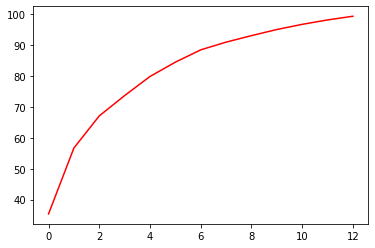

In [28]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [29]:
#Considering first column of Z-Score
#PC1 values
pca_values[:,0:1]

array([[ 3.62035297],
       [ 2.36201514],
       [ 2.78656155],
       [ 4.18172263],
       [ 1.31974552],
       [ 3.43524132],
       [ 2.75292349],
       [ 2.43156049],
       [ 2.78457113],
       [ 2.9967073 ],
       [ 3.75479172],
       [ 2.02403693],
       [ 2.36856214],
       [ 3.70661943],
       [ 4.64352777],
       [ 2.66299047],
       [ 2.60937135],
       [ 2.2633756 ],
       [ 3.94704455],
       [ 2.39325539],
       [ 3.36001783],
       [ 0.88620564],
       [ 2.69005671],
       [ 1.78213887],
       [ 1.90998099],
       [ 1.29881217],
       [ 2.04090864],
       [ 1.44975545],
       [ 2.42965992],
       [ 2.45658595],
       [ 2.78808363],
       [ 3.00257882],
       [ 1.83340233],
       [ 2.27415568],
       [ 1.6971213 ],
       [ 2.10518727],
       [ 1.6644551 ],
       [ 1.35243551],
       [ 1.62798927],
       [ 2.9109787 ],
       [ 2.8368159 ],
       [ 0.93116763],
       [ 3.3410341 ],
       [ 0.30430505],
       [ 2.27742215],
       [ 1

In [31]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)
finalDf

,pc1,pc2,Type
0,3.620353,-1.016549,1
1,2.362015,0.303496,1
2,2.786562,-0.758738,1
3,4.181723,-2.061462,1
4,1.319746,-0.927810,1
...,...,...,...
173,-2.937128,-2.768749,3
174,-2.256011,-2.182580,3
175,-2.198706,-3.144082,3
176,-1.978971,-2.648396,3


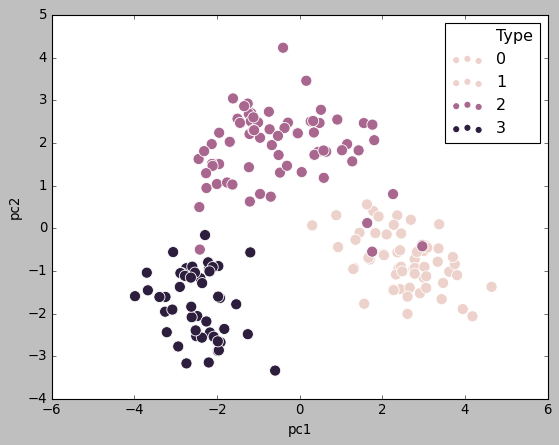

In [34]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type',s = 100)  

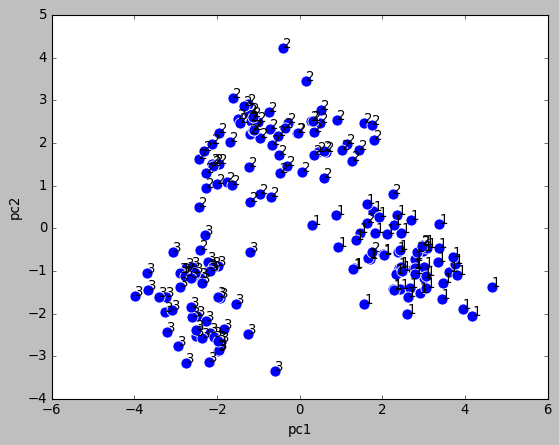

In [36]:
p1 = sns.scatterplot(data=finalDf,x='pc1',y='pc2',s = 100)  
for line in range(0,finalDf.shape[0]):
     p1.text(finalDf.pc1[line], finalDf.pc2[line], finalDf.Type[line], horizontalalignment='left', size='medium')
        

In [56]:
#Consider first 6 column to calculate PC1, PC2, PC3, pc4, pc5, pc6
finalDf1 = pd.concat([pd.DataFrame(pca_values[:,0:6],columns=['pc1','pc2','pc3','pc4','pc5','pc6']), wine[['Type']]], axis = 1)
finalDf1

,pc1,pc2,pc3,pc4,pc5,pc6,Type
0,3.620353,-1.016549,-0.099667,-0.225128,0.610182,-0.159005,1
1,2.362015,0.303496,-2.062085,-0.296773,-0.197062,-0.982070,1
2,2.786562,-0.758738,1.024408,0.739412,-0.230592,0.498384,1
3,4.181723,-2.061462,-0.016241,0.639007,-0.485019,0.272282,1
4,1.319746,-0.927810,2.024388,-0.442363,0.350902,-0.459153,1
...,...,...,...,...,...,...,...
173,-2.937128,-2.768749,-0.277357,1.089782,-0.531256,-1.140960,3
174,-2.256011,-2.182580,0.255081,0.349126,0.231958,0.003873,3
175,-2.198706,-3.144082,-0.844854,0.294488,1.142061,0.396860,3
176,-1.978971,-2.648396,-0.472823,-0.688906,0.650936,1.248730,3


TypeError: too many positional arguments

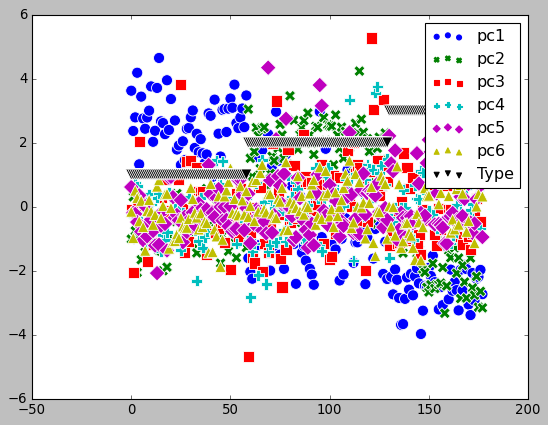

In [57]:
p2 = sns.scatterplot(data=finalDf1,s = 100)  
for line in range(0,finalDf1.shape[0]):
     p2.text(finalDf1.pc1[line], finalDf1.pc2[line],finalDf1.pc3[line], finalDf1.pc4[line],finalDf1.pc5[line], finalDf1.pc6[line], finalDf1.Type[line], horizontalalignment='left', size='medium')